In [1]:
import torch
import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = T.Compose([
    T.NormalizeFeatures(),
    T.ToDevice(device),
    T.RandomLinkSplit(num_val=0.05, num_test=0.1, is_undirected=True, split_labels=True, add_negative_train_samples=False),
])

dataset = Planetoid('.', name='Cora', transform=transform)

train_data, val_data, test_data = dataset[0]

Processing...
Done!


In [4]:
from torch_geometric.nn import GCNConv, VGAE

class Encoder(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.conv1 = GCNConv(dim_in, 2 * dim_out)
        self.conv_mu = GCNConv(2 * dim_out, dim_out)
        self.conv_logstd = GCNConv(2 * dim_out, dim_out)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv_mu(x, edge_index), self.conv_logstd(x, edge_index)

model = VGAE(Encoder(dataset.num_features, 16)).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train():
    model.train()
    optimizer.zero_grad()
    print(train_data.edge_index)
    z = model.encode(train_data.x, train_data.edge_index)
    loss = model.recon_loss(z, train_data.pos_edge_label_index) + (1 / train_data.num_nodes) * model.kl_loss()
    loss.backward()
    optimizer.step()
    return float(loss)

@torch.no_grad()
def test(data):
    model.eval()
    z = model.encode(data.x, data.edge_index)
    return model.test(z, data.pos_edge_label_index, data.neg_edge_label_index)

for epoch in range(301):
    loss = train()
    val_auc, val_ap = test(val_data)
    if epoch % 50 == 0:
        print(f'Epoch: {epoch:>3} | Val AUC: {val_auc:.4f} | Val AP: {val_ap:.4f}')

val_auc, val_ap = test(val_data)
print(f'\nTest AUC: {val_auc:.4f} | Test AP: {val_ap:.4f}')

tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
Epoch:   0 | Val AUC: 0.6899 | Val AP: 0.7257
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  14

tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 119

tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
Epoch: 150 | Val AUC: 0.7287 | Val AP: 0.7409
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  14

tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 119

tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
tensor([[1275, 1414, 1193,  ...,  573,  343,  456],
        [1468, 2270, 1705,  ...,  306,  311,  142]], device='cuda:0')
Epoch: 300 | Val AUC: 0.8562 | Val AP: 0.8615

Test AUC: 0.8562 | Test AP: 0.8615


In [3]:
z = model.encode(test_data.x, test_data.edge_index)
adj = torch.where((z @ z.T) > 0.9, 1, 0)
adj

tensor([[1, 0, 1,  ..., 0, 1, 1],
        [0, 1, 1,  ..., 0, 1, 1],
        [1, 1, 1,  ..., 0, 1, 1],
        ...,
        [0, 0, 0,  ..., 1, 0, 0],
        [1, 1, 1,  ..., 0, 1, 1],
        [1, 1, 1,  ..., 0, 1, 1]], device='cuda:0')

In [5]:
import torch
from torch_geometric.datasets import MoleculeNet
from torch_geometric.data import DataLoader
from torch_geometric.nn import VGAE, GCNConv
from torch_geometric.utils import train_test_split_edges, negative_sampling

# Step 1: Load the HIV dataset
dataset = MoleculeNet(root='data/MoleculeNet', name='HIV')
data = dataset[0]

# Convert the graph for link prediction
data = train_test_split_edges(data)  # Splits edges into train/test sets

# Step 2: Define the VGAE model
class GCNEncoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCNEncoder, self).__init__()
        self.conv1 = GCNConv(in_channels, 2 * out_channels)
        self.conv2 = GCNConv(2 * out_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

# VGAE with a GCN encoder
out_channels = 16  # Dimension of latent space
model = VGAE(GCNEncoder(dataset.num_node_features, out_channels))

# Step 3: Define optimizer and loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()

# Step 4: Train the VGAE model
def train():
    model.train()
    optimizer.zero_grad()

    # Encode node embeddings
    z = model.encode(data.x, data.train_pos_edge_index)

    # Reconstruct edges
    pos_edge_index = data.train_pos_edge_index
    neg_edge_index = negative_sampling(
        edge_index=pos_edge_index, num_nodes=data.num_nodes,
        num_neg_samples=pos_edge_index.size(1))

    pos_loss = -torch.log(model.decoder(z, pos_edge_index) + 1e-15).mean()
    neg_loss = -torch.log(1 - model.decoder(z, neg_edge_index) + 1e-15).mean()
    loss = pos_loss + neg_loss
    loss.backward()
    optimizer.step()
    return loss

# Step 5: Evaluate the model
@torch.no_grad()
def test():
    model.eval()
    z = model.encode(data.x, data.train_pos_edge_index)

    pos_edge_index = data.test_pos_edge_index
    neg_edge_index = data.test_neg_edge_index

    pos_pred = model.decoder(z, pos_edge_index)
    neg_pred = model.decoder(z, neg_edge_index)

    pred = torch.cat([pos_pred, neg_pred], dim=0)
    true = torch.cat([torch.ones(pos_pred.size(0)), torch.zeros(neg_pred.size(0))], dim=0)

    return ((pred > 0.5) == true).sum().item() / true.size(0)

# Train and test the VGAE
for epoch in range(1, 101):
    loss = train()
    if epoch % 10 == 0:
        acc = test()
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')


Processing...
Done!
/home/volta/Documents/ucph/Thesis/thesis_venv/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


RuntimeError: Found dtype Long but expected Float

In [8]:
data

Data(x=[19, 9], smiles='CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)=[O+]2', y=[1, 1], val_pos_edge_index=[2, 1], val_pos_edge_attr=[1, 3], test_pos_edge_index=[2, 2], test_pos_edge_attr=[2, 3], train_pos_edge_index=[2, 34], train_pos_edge_attr=[34, 3], train_neg_adj_mask=[19, 19], val_neg_edge_index=[2, 1], test_neg_edge_index=[2, 2])

In [11]:
dataset[1]

Data(x=[39, 9], edge_index=[2, 88], edge_attr=[88, 3], smiles='C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3)CC(c3ccccc3)=[O+]2)[O+]=C(c2ccccc2)C1', y=[1, 1])

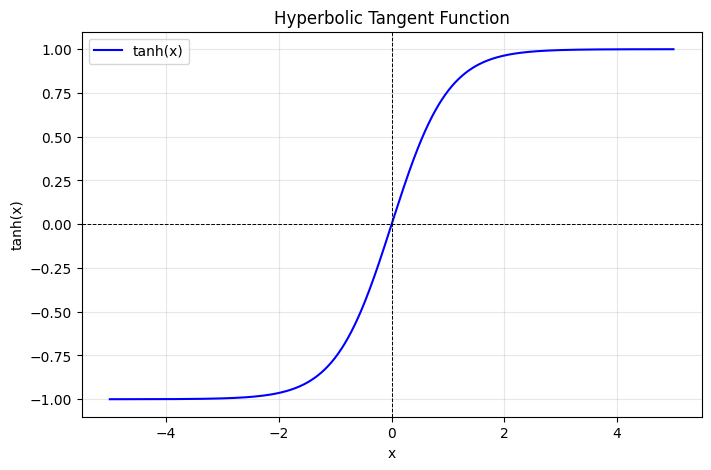

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values (input range)
x = np.linspace(-5, 5, 500)  # Generate 500 points from -5 to 5

# Compute the hyperbolic tangent (tanh) of x
y = np.tanh(x)


# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="tanh(x)", color="blue")
plt.axhline(0, color='black', linewidth=0.7, linestyle="--")  # Add x-axis
plt.axvline(0, color='black', linewidth=0.7, linestyle="--")  # Add y-axis
plt.title("Hyperbolic Tangent Function")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


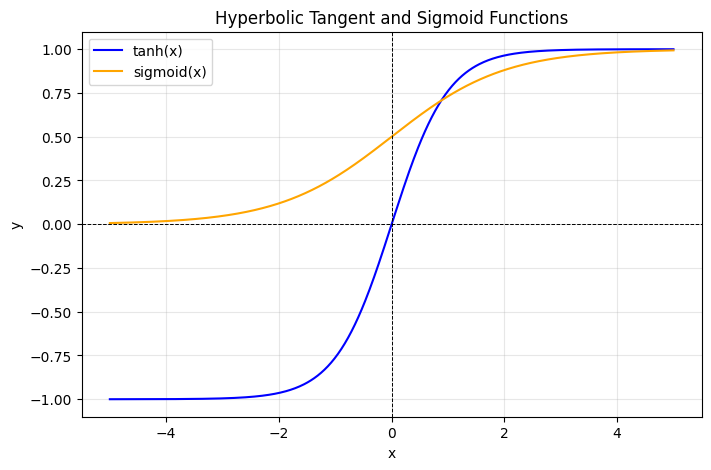

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values (input range)
x = np.linspace(-5, 5, 500)  # Generate 500 points from -5 to 5

# Compute the hyperbolic tangent (tanh) and sigmoid of x
tanh_y = np.tanh(x)
sigmoid_y = 1 / (1 + np.exp(-x))  # Sigmoid function

# Plot the functions
plt.figure(figsize=(8, 5))
plt.plot(x, tanh_y, label="tanh(x)", color="blue")
plt.plot(x, sigmoid_y, label="sigmoid(x)", color="orange")
plt.axhline(0, color='black', linewidth=0.7, linestyle="--")  # Add x-axis
plt.axvline(0, color='black', linewidth=0.7, linestyle="--")  # Add y-axis
plt.title("Hyperbolic Tangent and Sigmoid Functions")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


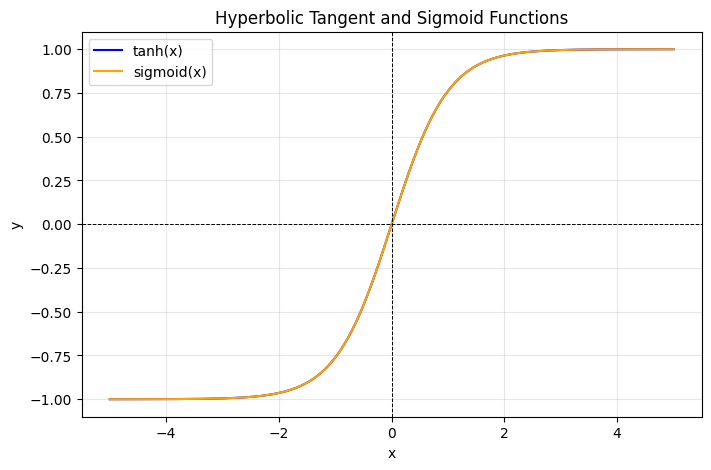

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values (input range)
x = np.linspace(-5, 5, 500)  # Generate 500 points from -5 to 5

# Compute the hyperbolic tangent (tanh) and sigmoid of x
tanh_y = np.tanh(x)
sigmoid_y = 2*((1 / (1 + np.exp(-2*x)))-1/2)  # Sigmoid function

# Plot the functions
plt.figure(figsize=(8, 5))
plt.plot(x, tanh_y, label="tanh(x)", color="blue")
plt.plot(x, sigmoid_y, label="sigmoid(x)", color="orange")
plt.axhline(0, color='black', linewidth=0.7, linestyle="--")  # Add x-axis
plt.axvline(0, color='black', linewidth=0.7, linestyle="--")  # Add y-axis
plt.title("Hyperbolic Tangent and Sigmoid Functions")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [23]:
vector = np.random.rand(5)
vector

array([0.10078705, 0.88873022, 0.71508181, 0.76533014, 0.82428706])

In [24]:
np.outer(vector,vector)

array([[0.01015803, 0.08957249, 0.07207098, 0.07713536, 0.08307746],
       [0.08957249, 0.7898414 , 0.63551481, 0.68017202, 0.73256882],
       [0.07207098, 0.63551481, 0.511342  , 0.54727366, 0.58943269],
       [0.07713536, 0.68017202, 0.54727366, 0.58573022, 0.63085173],
       [0.08307746, 0.73256882, 0.58943269, 0.63085173, 0.67944916]])